<a href="https://colab.research.google.com/github/leticiagomescs/Data_Science_Study_Projects/blob/master/KMeans_Clustering_in_Customer_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Esse conjunto de dados é criado apenas para fins de aprendizado dos conceitos de segmentação de clientes, também conhecidos como análise de cesta de mercado. Demonstrarei isso usando a técnica de ML não supervisionada (algoritmo de clustering do KMeans) da forma mais simples.

https://github.com/SteffiPeTaffy/machineLearningAZ/blob/master/Machine%20Learning%20A-Z%20Template%20Folder/Part%204%20-%20Clustering/Section%2025%20-%20Hierarchical%20Clustering/Mall_Customers.csv


## CASE

O objeto de estudo é um shopping center que através do programa de fidelidade de clientes por meio de cartões de sócio, possui alguns dados básicos sobre seus clientes como: 
- **CustomerID** (ID_cliente): ID do cliente no sistema do shopping;
- **Gender** (Gênero): Gênero `Male`(Masculino) ou `Female`(Feminino); 
- **Age** (Idade): Idade em anos;
- **Annual Income (k$)** (Rendimento_anual): ;
- **Spending Score (1-100)** (Pontuacao_gastos): ;

A pontuação de gastos é algo que você atribui ao cliente com base em seus parâmetros definidos, como comportamento do cliente e dados de compra.

## O PROBLEMA

Você foi contratado pelo dono do shopping que deseja entender seus clientes e ser mais assertivo em ofertas e sugestões de produtos. 

### Perguntas

1. Como meus clientes estão divididos? 
2. Quem são seus clientes-alvo com os quais você pode iniciar a estratégia de marketing [fácil de conversar]; 
3. Qual gênero compra mais?
4. Qual classe social mais frequenta o shopping?
5. Qual a faixa hetária que mais compra?


### Hipóteses

- Quanto maior a Renda Anual, maior o número de pontos;
- Os consumidores do gênero feminino são os maiores consumidores; 
- 

## IMPORTANDO OS PACOTES

In [ ]:
# Álgebra Linear:
import numpy as np

# Processamento/manipulação dos dados:
import pandas as pd

# Visualização dos dados:
import matplotlib.pyplot as plt 
import seaborn as sns 
import plotly as py
import plotly.graph_objs as go
import warnings

# import o ProfileReport
from pandas_profiling import ProfileReport

#
from sklearn.cluster import KMeans

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
# instalando o pandas profiling
!pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip

     |████████████████████████████████| 26.8MB 1.2MB/s 
     |████████████████████████████████| 61kB 3.0MB/s 
     |████████████████████████████████| 614kB 8.6MB/s 
     |████████████████████████████████| 3.1MB 20.7MB/s 
     |████████████████████████████████| 71kB 8.4MB/s 
     |████████████████████████████████| 296kB 26.9MB/s 
  Created wheel for pandas-profiling: filename=pandas_profiling-2.8.0-py2.py3-none-any.whl size=259932 sha256=ed7bd9b6d0e85828b39d30281990bbed350b91a96f8b97a99ca87c3185b39f5d
  Stored in directory: /tmp/pip-ephem-wheel-cache-7ft98wb9/wheels/56/c2/dd/8d945b0443c35df7d5f62fa9e9ae105a2d8b286302b92e0109
  Created wheel for confuse: filename=confuse-1.1.0-cp36-none-any.whl size=17574 sha256=8756bfd1e8ff2a68dcd3c24df121692936a7ea58456bedeb68a27db298da6a07
  Stored in directory: /root/.cache/pip/wheels/f6/8b/23/41a1b516f6d8d4cc81f5bdb55394a47cdbe9659c53668d3c9e
  Created wheel for htmlmin: filename=htmlmin-0.1.12-cp36-none-any.whl size=27084 sha256=19e621721c9c6e80530

## IMPORTANDO O DATASET

In [ ]:
df = pd.read_csv('Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


## EXPLORAÇÃO DOS DADOS

Para um melhor entendemento do conjunto, traduzi os nomes das colunas.

In [ ]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [ ]:
df.columns=['ID_cliente','Genero','Idade','Rendimento_anual','Pontuacao_gastos']

In [ ]:
df.head()

,ID_cliente,Genero,Idade,Rendimento_anual,Pontuacao_gastos
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


Entendendo o dataset

In [ ]:
# Total de linhas e colunas do datset
df.shape

(200, 5)

In [ ]:
df.ID_cliente.nunique()

200

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   ID_cliente        200 non-null    int64 
 1   Genero            200 non-null    object
 2   Idade             200 non-null    int64 
 3   Rendimento_anual  200 non-null    int64 
 4   Pontuacao_gastos  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [ ]:
df.dtypes

ID_cliente           int64
Genero              object
Idade                int64
Rendimento_anual     int64
Pontuacao_gastos     int64
dtype: object

In [ ]:
df.dtypes.value_counts()

int64     4
object    1
dtype: int64

In [ ]:
# Informações estatísticas do dataset
df.describe()

,ID_cliente,Idade,Rendimento_anual,Pontuacao_gastos
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [ ]:
df.isnull().any().any()

False

In [ ]:
# Verificando a existência de Missing values
df.isnull().sum()

ID_cliente          0
Genero              0
Idade               0
Rendimento_anual    0
Pontuacao_gastos    0
dtype: int64

## ANÁLISE DOS DADOS

In [ ]:
df['Rendimento_anual'].mean()

60.56

In [ ]:
# Segmentando os clientes por gênero e rendimento anual médio:
df.groupby('Genero')['Rendimento_anual'].mean()

Genero
Female    59.250000
Male      62.227273
Name: Rendimento_anual, dtype: float64

In [ ]:
# Segmentando os clientes por gênero e Pontuação média de gastos:
df.groupby('Genero')['Pontuacao_gastos'].mean()

Genero
Female    51.526786
Male      48.511364
Name: Pontuacao_gastos, dtype: float64

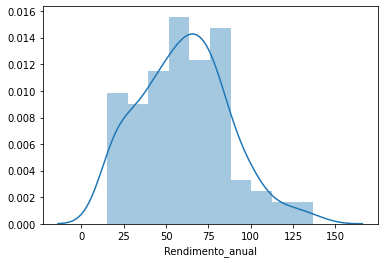

Skewness:  0.3218425498619055
Kurtosis:  -0.09848708652696203


In [ ]:
plt.title('')
sns.distplot(df['Rendimento_anual'])
plt.show()
print('Skewness: ',df['Rendimento_anual'].skew())
print('Kurtosis: ',df['Rendimento_anual'].kurtosis())

In [ ]:
df[(df['Rendimento_anual']<df['Rendimento_anual'].mean())].shape

(98, 5)

Vizulizando o resultado acima percebemos que os clientes estão bem divididos.

## CATEGORIZANDO OS DADOS

## VIZUALIZAÇÃO DOS DADOS

In [ ]:
# executando o profile
profile = ProfileReport(df, title='Relatório - Pandas Profiling', html={'style':{'full_width':True}})
profile

In [ ]:
# salvando o relatório no disco
profile.to_file(output_file="Relatorio01.html")

In [ ]:
plt.style.use('fivethirtyeight')

### Histograms

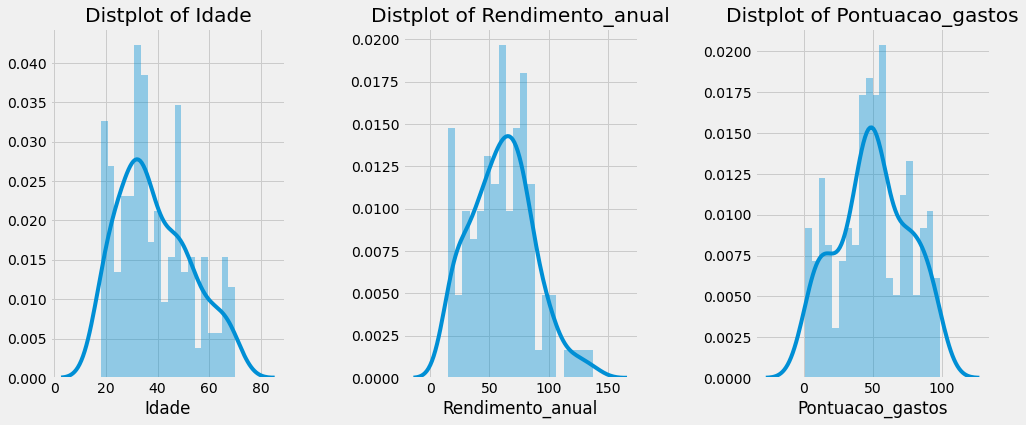

In [ ]:
plt.figure(1 , figsize = (15 , 6))
n = 0 
for x in ['Idade' , 'Rendimento_anual' , 'Pontuacao_gastos']:
    n += 1
    plt.subplot(1 , 3 , n)
    plt.subplots_adjust(hspace = 0.5 , wspace = 0.5)
    sns.distplot(df[x], bins = 20)
    plt.title('Distplot of {}'.format(x))
plt.show()

### Count Plot of Gender

Text(0, 0.5, '')

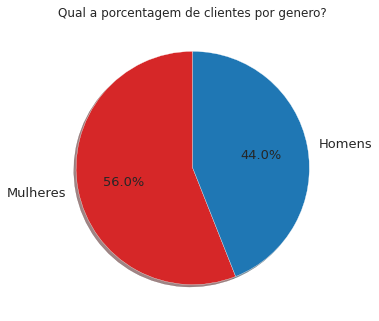

In [ ]:
df['Genero'].value_counts().plot.pie(colors=('tab:red', 'tab:blue'),title='Qual a porcentagem de clientes por genero?',fontsize=13, shadow=True,startangle=90,autopct='%1.1f%%',
labels=('Mulheres','Homens'),  figsize=(5,5)).set_ylabel('')

In [ ]:
genero = df['Genero'].value_counts()
genero

Female    112
Male       88
Name: Genero, dtype: int64

### Ploting the Relation between Age , Annual Income and Spending Score

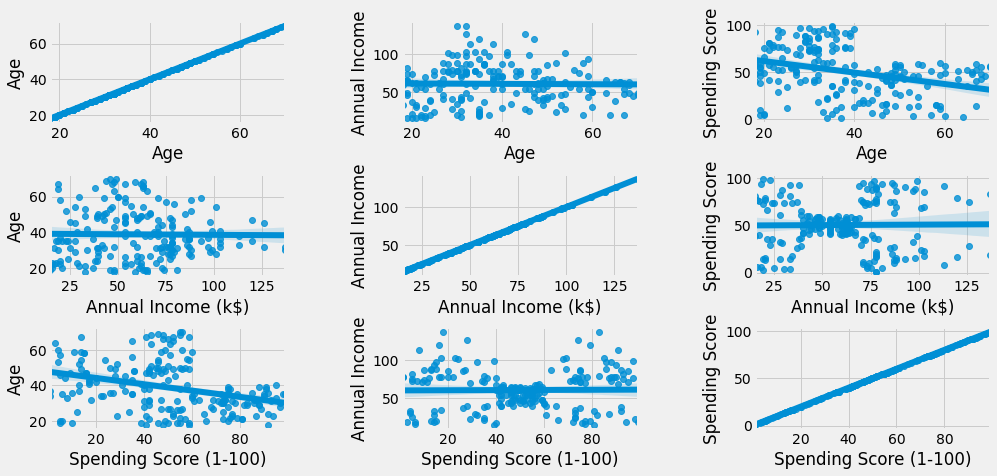

In [ ]:
plt.figure(1 , figsize = (15 , 7))
n = 0 
for x in ['Age' , 'Annual Income (k$)' , 'Spending Score (1-100)']:
    for y in ['Age' , 'Annual Income (k$)' , 'Spending Score (1-100)']:
        n += 1
        plt.subplot(3 , 3 , n)
        plt.subplots_adjust(hspace = 0.5 , wspace = 0.5)
        sns.regplot(x = x , y = y , data = df)
        plt.ylabel(y.split()[0]+' '+y.split()[1] if len(y.split()) > 1 else y )
plt.show()

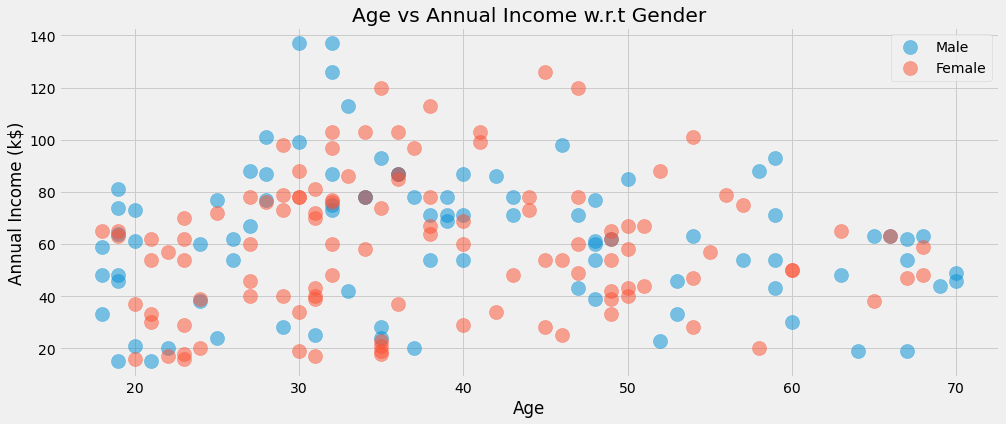

In [ ]:
plt.figure(1 , figsize = (15 , 6))
for gender in ['Male' , 'Female']:
    plt.scatter(x = 'Age' , y = 'Annual Income (k$)' , data = df[df['Gender'] == gender] ,
                s = 200 , alpha = 0.5 , label = gender)
plt.xlabel('Age'), plt.ylabel('Annual Income (k$)') 
plt.title('Age vs Annual Income w.r.t Gender')
plt.legend()
plt.show()

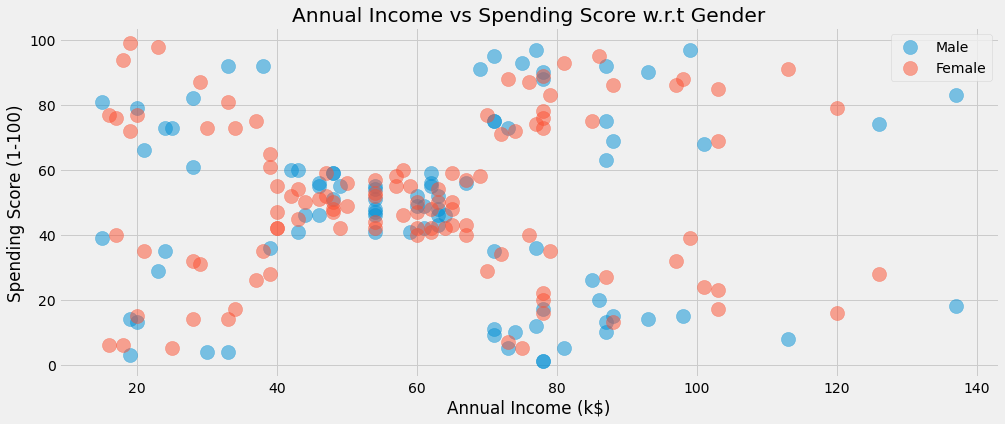

In [ ]:
plt.figure(1 , figsize = (15 , 6))
for gender in ['Male' , 'Female']:
    plt.scatter(x = 'Annual Income (k$)',y = 'Spending Score (1-100)' ,
                data = df[df['Gender'] == gender] ,s = 200 , alpha = 0.5 , label = gender)
plt.xlabel('Annual Income (k$)'), plt.ylabel('Spending Score (1-100)') 
plt.title('Annual Income vs Spending Score w.r.t Gender')
plt.legend()
plt.show()

### Distribution of values in Age , Annual Income and Spending Score according to Gender

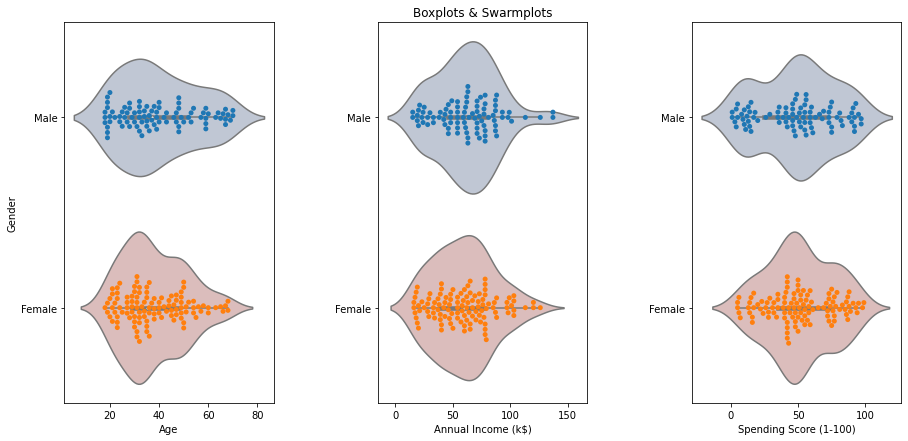

In [ ]:
plt.figure(1 , figsize = (15 , 7))
n = 0 
for cols in ['Age' , 'Annual Income (k$)' , 'Spending Score (1-100)']:
    n += 1 
    plt.subplot(1 , 3 , n)
    plt.subplots_adjust(hspace = 0.5 , wspace = 0.5)
    sns.violinplot(x = cols , y = 'Gender' , data = df , palette = 'vlag')
    sns.swarmplot(x = cols , y = 'Gender' , data = df)
    plt.ylabel('Gender' if n == 1 else '')
    plt.title('Boxplots & Swarmplots' if n == 2 else '')
plt.show()

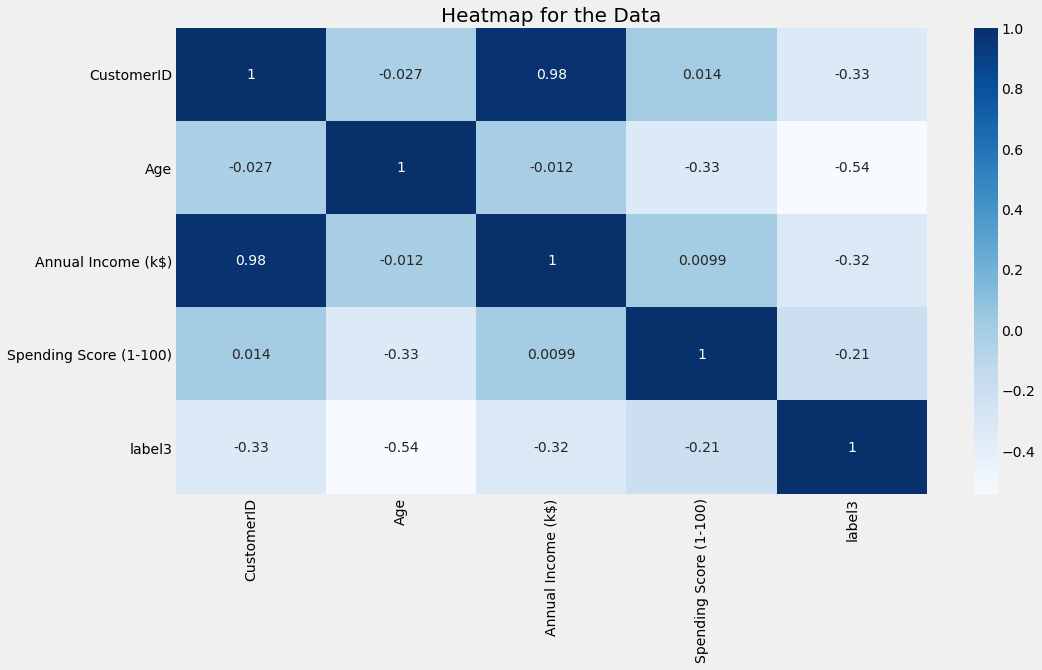

In [ ]:
plt.rcParams['figure.figsize'] = (15, 8)
sns.heatmap(df.corr(),cmap = 'Blues', annot = True)
plt.title('Heatmap for the Data', fontsize = 20)
plt.show()

O gráfico acima para mostrar a correlação entre os diferentes atributos do conjunto de dados de segmentação de clientes do shopping, este mapa de calor reflete os recursos mais correlacionados com a cor laranja e os menos correlatos com a cor amarela.

Podemos ver claramente que esses atributos não têm boa correlação entre eles, é por isso que prosseguiremos com todos os recursos.

## Clustering using K- means

### 1.Segmentation using Age and Spending Score

In [ ]:
'''Age and spending Score'''
X1 = df[['Age' , 'Spending Score (1-100)']].iloc[: , :].values
inertia = []
for n in range(1 , 11):
    algorithm = (KMeans(n_clusters = n ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
    algorithm.fit(X1)
    inertia.append(algorithm.inertia_)

Selecting N Clusters based in Inertia (Squared Distance between Centroids and data points, should be less)

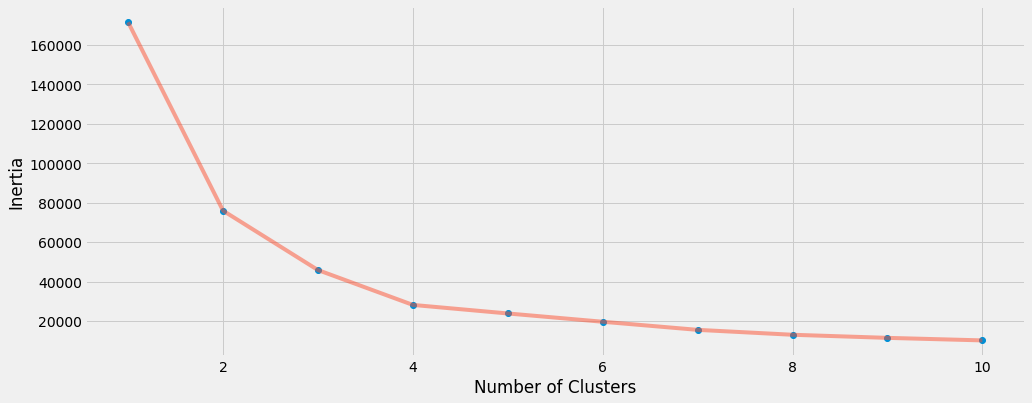

In [ ]:
plt.figure(1 , figsize = (15 ,6))
plt.plot(np.arange(1 , 11) , inertia , 'o')
plt.plot(np.arange(1 , 11) , inertia , '-' , alpha = 0.5)
plt.xlabel('Number of Clusters') , plt.ylabel('Inertia')
plt.show()

In [ ]:
algorithm = (KMeans(n_clusters = 4 ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
algorithm.fit(X1)
labels1 = algorithm.labels_
centroids1 = algorithm.cluster_centers_

In [ ]:
h = 0.02
x_min, x_max = X1[:, 0].min() - 1, X1[:, 0].max() + 1
y_min, y_max = X1[:, 1].min() - 1, X1[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = algorithm.predict(np.c_[xx.ravel(), yy.ravel()]) 

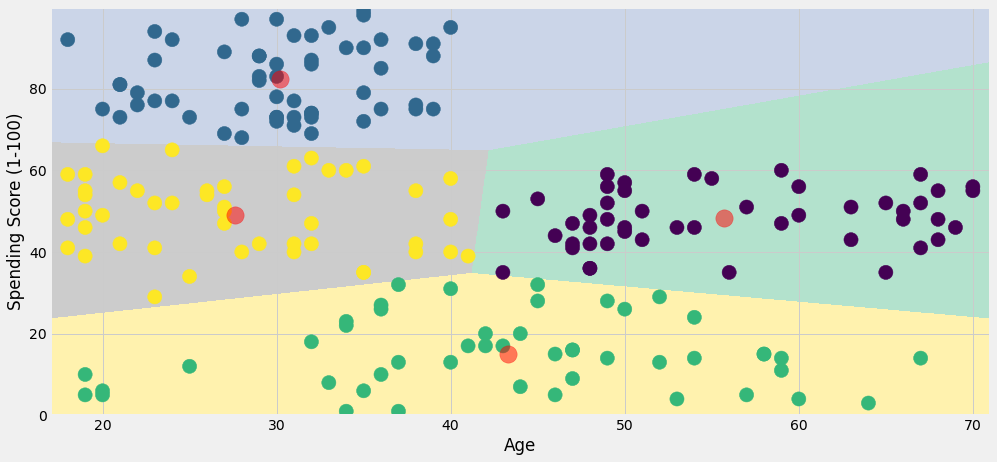

In [ ]:
plt.figure(1 , figsize = (15 , 7) )
plt.clf()
Z = Z.reshape(xx.shape)
plt.imshow(Z , interpolation='nearest', 
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap = plt.cm.Pastel2, aspect = 'auto', origin='lower')

plt.scatter( x = 'Age' ,y = 'Spending Score (1-100)' , data = df , c = labels1 , 
            s = 200 )
plt.scatter(x = centroids1[: , 0] , y =  centroids1[: , 1] , s = 300 , c = 'red' , alpha = 0.5)
plt.ylabel('Spending Score (1-100)') , plt.xlabel('Age')
plt.show()

### 2.Segmentation using Annual Income and Spending Score

In [ ]:
'''Annual Income and spending Score'''
X2 = df[['Annual Income (k$)' , 'Spending Score (1-100)']].iloc[: , :].values
inertia = []
for n in range(1 , 11):
    algorithm = (KMeans(n_clusters = n ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
    algorithm.fit(X2)
    inertia.append(algorithm.inertia_)

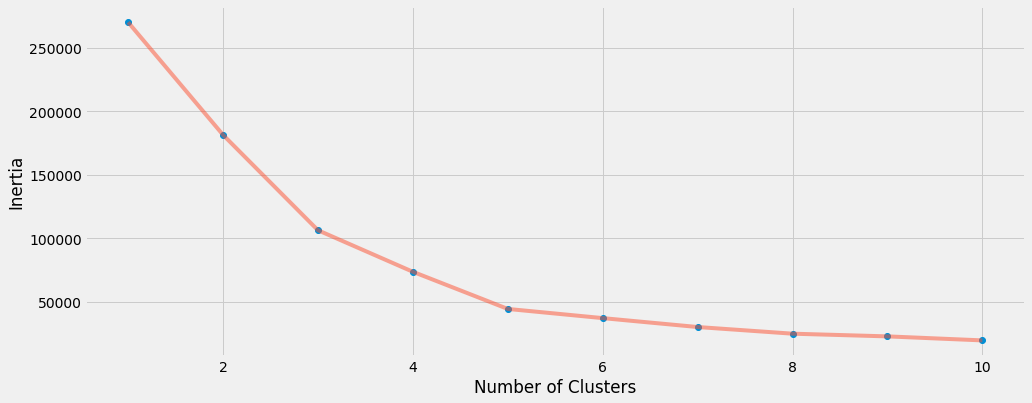

In [ ]:
plt.figure(1 , figsize = (15 ,6))
plt.plot(np.arange(1 , 11) , inertia , 'o')
plt.plot(np.arange(1 , 11) , inertia , '-' , alpha = 0.5)
plt.xlabel('Number of Clusters') , plt.ylabel('Inertia')
plt.show()

In [ ]:
algorithm = (KMeans(n_clusters = 5 ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
algorithm.fit(X2)
labels2 = algorithm.labels_
centroids2 = algorithm.cluster_centers_

In [ ]:
h = 0.02
x_min, x_max = X2[:, 0].min() - 1, X2[:, 0].max() + 1
y_min, y_max = X2[:, 1].min() - 1, X2[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z2 = algorithm.predict(np.c_[xx.ravel(), yy.ravel()]) 

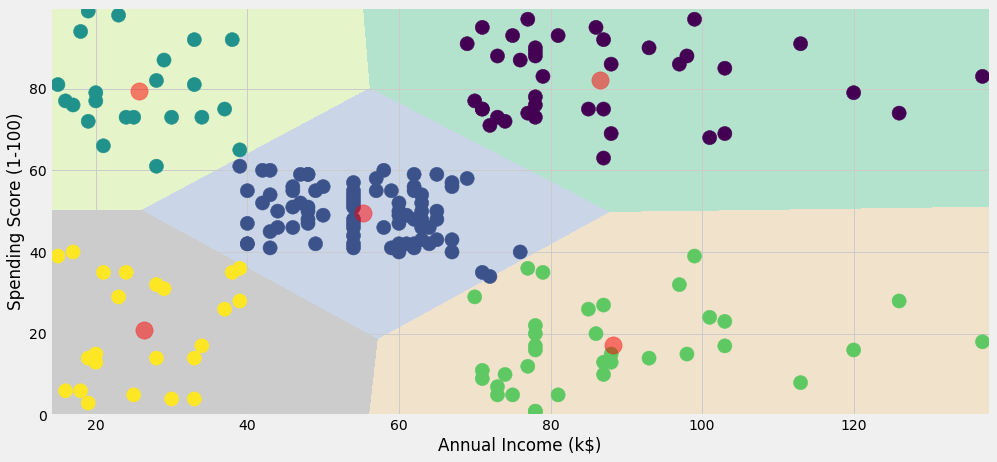

In [ ]:
plt.figure(1 , figsize = (15 , 7) )
plt.clf()
Z2 = Z2.reshape(xx.shape)
plt.imshow(Z2 , interpolation='nearest', 
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap = plt.cm.Pastel2, aspect = 'auto', origin='lower')

plt.scatter( x = 'Annual Income (k$)' ,y = 'Spending Score (1-100)' , data = df , c = labels2 , 
            s = 200 )
plt.scatter(x = centroids2[: , 0] , y =  centroids2[: , 1] , s = 300 , c = 'red' , alpha = 0.5)
plt.ylabel('Spending Score (1-100)') , plt.xlabel('Annual Income (k$)')
plt.show()

### 3.Segmentation using Age, Annual Income and Spending Score

In [ ]:
X3 = df[['Age' , 'Annual Income (k$)' ,'Spending Score (1-100)']].iloc[: , :].values
inertia = []
for n in range(1 , 11):
    algorithm = (KMeans(n_clusters = n ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
    algorithm.fit(X3)
    inertia.append(algorithm.inertia_)

In [ ]:
algorithm = (KMeans(n_clusters = 6 ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
algorithm.fit(X3)
labels3 = algorithm.labels_
centroids3 = algorithm.cluster_centers_

In [ ]:
df['label3'] =  labels3
trace1 = go.Scatter3d(
    x= df['Age'],
    y= df['Spending Score (1-100)'],
    z= df['Annual Income (k$)'],
    mode='markers',
     marker=dict(
        color = df['label3'], 
        size= 20,
        line=dict(
            color= df['label3'],
            width= 12
        ),
        opacity=0.8
     )
)
data = [trace1]
layout = go.Layout(
#     margin=dict(
#         l=0,
#         r=0,
#         b=0,
#         t=0
#     )
    title= 'Clusters',
    scene = dict(
            xaxis = dict(title  = 'Age'),
            yaxis = dict(title  = 'Spending Score'),
            zaxis = dict(title  = 'Annual Income')
        )
)
fig = go.Figure(data=data, layout=layout)
py.offline.iplot(fig)

## Considerações

Para uma análise mais apurada precisaríamos de dados mais detalhados, por exemplo dados de compra dos cliente [`Produto`,`Valor`,`Data`]. Mas com os dados que possuímos já conseguirmos gerar algum valor para a empresa e identificar qual a orientação para as novas coletas de dados.